## データの補完
不規則な地点で観測されたデータのみから全体を補完する時には `scipy.interpolate.griddata` を使うことができる。

参考文献：[Scattered data interpolation (griddata)](https://docs.scipy.org/doc/scipy/tutorial/interpolate/ND_unstructured.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
from scipy.interpolate import griddata


def func(x, y):
    return (x - 0.5) ** 2 + (y - 0.5) ** 2 + np.sin((x - 0.5) ** 2)


grid_x, grid_y = np.meshgrid(
    np.linspace(0, 1, 100), np.linspace(0, 1, 100), indexing="ij"
)

## データ数による補完精度の違い
データ数を増やすとより正確に補完できるようすが確認できる。
近傍法は仕組み上どうしてもタイルを並べたような補完になってしまう。

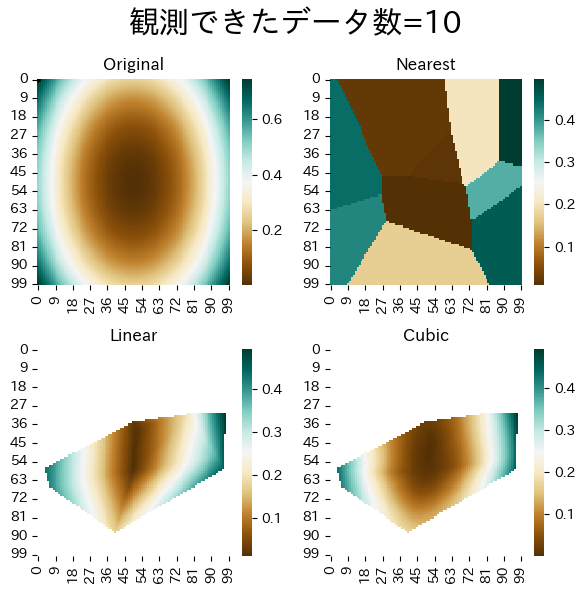

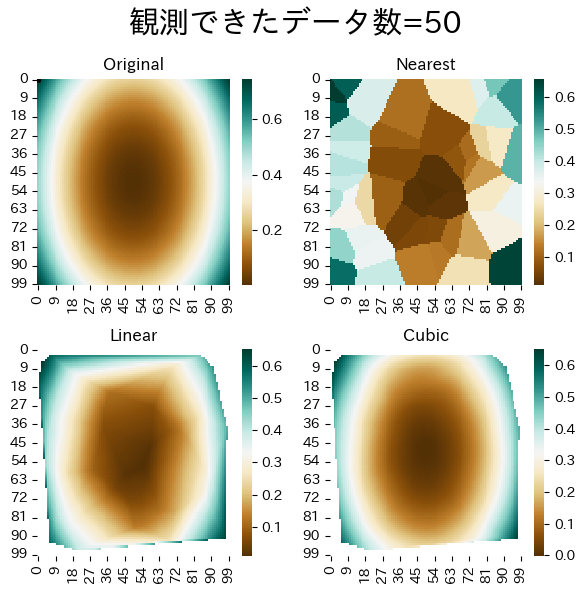

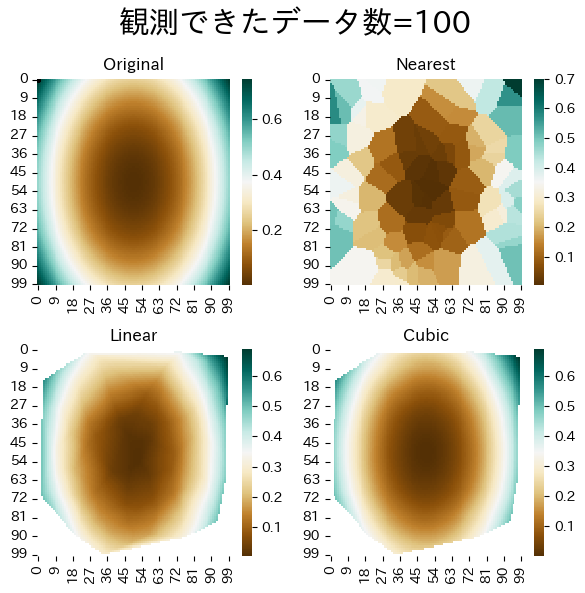

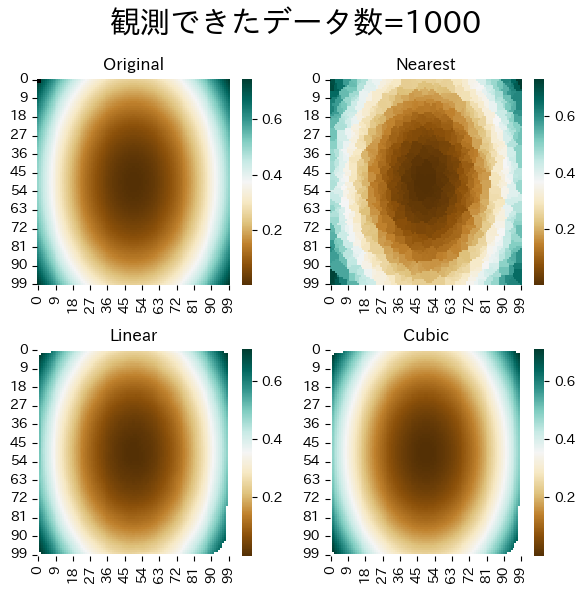

In [2]:
rng = np.random.default_rng()

for points_num in [10, 50, 100, 1000]:
    points = rng.random((points_num, 2))
    values = func(points[:, 0], points[:, 1])

    grid_z0 = griddata(points, values, (grid_x, grid_y), method="nearest")
    grid_z1 = griddata(points, values, (grid_x, grid_y), method="linear")
    grid_z2 = griddata(points, values, (grid_x, grid_y), method="cubic")

    plt.suptitle(f"観測できたデータ数={points_num}", fontsize=22)
    plt.subplot(221)
    sns.heatmap(func(grid_x, grid_y).T, cmap="BrBG")
    plt.plot(points[:, 0], points[:, 1], "k.", ms=1)  # data
    plt.title("Original")
    plt.subplot(222)
    sns.heatmap(grid_z0.T, cmap="BrBG")
    plt.title("Nearest")
    plt.subplot(223)
    sns.heatmap(grid_z1.T, cmap="BrBG")
    plt.title("Linear")
    plt.subplot(224)
    sns.heatmap(grid_z2.T, cmap="BrBG")
    plt.title("Cubic")
    plt.gcf().set_size_inches(6, 6)
    plt.tight_layout()
    plt.show()